In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import explained_variance_score
from matplotlib import pyplot as plt

In [2]:
def savefig(filename, crop = True):
    plt.savefig('{}.pdf'.format(filename))
    plt.savefig('{}.eps'.format(filename))

## Constant Model

In [11]:
results0 = np.loadtxt("time.txt")
results2 = np.loadtxt("infectd.txt")

results6 = np.loadtxt("days.txt")
results7 = np.loadtxt("cases.txt")

results10 = np.loadtxt("beta.txt")
results11 = np.loadtxt("kappa.txt")
results12 = np.loadtxt("Nf.txt")


results13 = np.loadtxt("R_sq.txt")
results14 = np.loadtxt("MAPE.txt")
results15 = np.loadtxt("EV.txt")
results16 = np.loadtxt("RMSE.txt")

mse_train_loss = np.loadtxt("mse_train_loss.txt")
mse_validation_loss = np.loadtxt("mse_validation_loss.txt")
rmse_train_loss = np.loadtxt("rmse_train_loss.txt")
rmse_validation_loss = np.loadtxt("rmse_validation_loss.txt")




In [4]:
# All have this shape

print(results0.shape)
print(results2.shape)

print(results6.shape)
print(results7.shape)

print(results10.shape)
print(results11.shape)
print(results12.shape)

print(results13.shape)
print(results14.shape)
print(results15.shape)
print(results16.shape)

(10, 200)
(10, 200)
(122,)
(122,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)


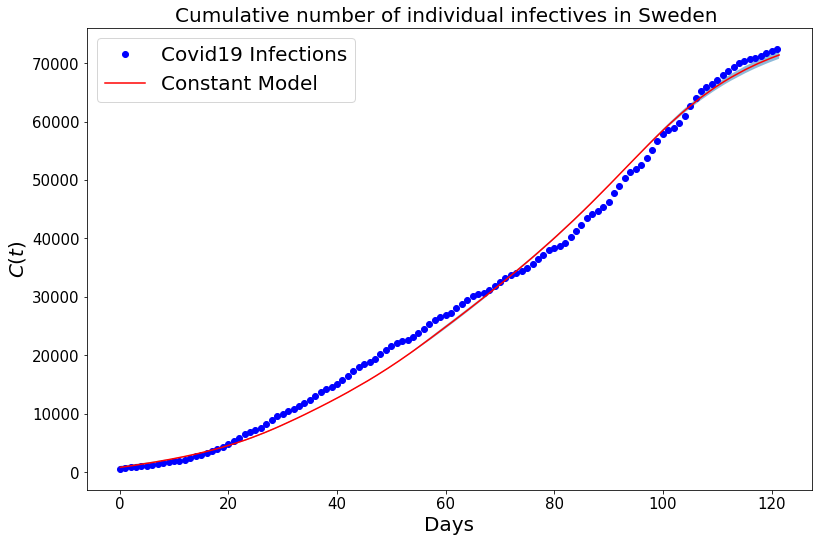

In [5]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Cumulative number of individual infectives in Sweden ',fontsize = 20)
ax1.plot(results6,results7,'bo')
ax1.plot(results0[0,:],np.mean(results2,0),'r')
ax1.fill_between(results0[0,:],                 
 np.mean(results2,0)-(1.96*np.std(results2,0)/np.sqrt(results2.shape[0])),
 np.mean(results2,0)+(1.96*np.std(results2,0)/np.sqrt(results2.shape[0])),
 alpha=0.5)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('$C(t)$', fontsize = 20)
ax1.legend(('Covid19 Infections','Constant Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

#savefig('./figures/italy_learn_params_01_new')

In [6]:
# mean and std of the parameters

mean_beta = np.mean(results10)
mean_kappa = np.mean(results11)
mean_Nf = np.mean(results12)

mean_R_sq = np.mean(results13)
mean_MAPE = np.mean(results14)
mean_EV = np.mean(results15)
mean_RMSE = np.mean(results16)


std_beta = np.std(results10)
std_kappa = np.std(results11)
std_Nf = np.std(results12)


std_R_sq = np.std(results13)
std_MAPE = np.std(results14)
std_EV = np.std(results15)
std_RMSE = np.std(results16)



In [7]:
print(mean_beta)
print(std_beta)

61.244516372999996
2.343417794180353


In [8]:
print(mean_kappa)
print(std_kappa)

0.05375622
0.002319182854080291


In [9]:
print(np.min(results7) + (np.max(results7) - np.min(results7))*mean_Nf)
print(np.min(results7) + (np.max(results7) - np.min(results7))*std_Nf)

76304.58879638399
4206.520525721698


In [10]:
print(mean_R_sq)
print(mean_MAPE)
print(mean_EV)
print(mean_RMSE)

0.9910194107380148
0.5274148310203122
0.6757068080707438
21596.112318160653


In [11]:
logistic_function = lambda t, Nf, beta, kappa: \
    Nf / (1 + beta * np.exp(-kappa *t)) 

In [12]:
def plateau(results7, mean_Nf, mean_beta, mean_kappa, diff = 10):
    #Nf_value, beta_value, kappa_value = logistic_params
    confirmed_now = results7[-1]
    confirmed_then = [-2]
    dayys = 25
    now = results6[-1]
    while confirmed_now - confirmed_then > diff:
        dayys += 1
        confirmed_then = confirmed_now
        confirmed_now =  logistic_function(
        now + dayys,
        mean_Nf,
        mean_beta,
        mean_kappa,
        )
    return dayys, confirmed_now

In [13]:
dayys, confirmed_now = plateau(results7, mean_Nf, mean_beta, mean_kappa)
print(f"In {dayys} days the number of infected people will plateau at {int(np.min(results7) + (np.max(results7) - np.min(results7))*confirmed_now)}")

In 26 days the number of infected people will plateau at 74627


### Constant Prediction

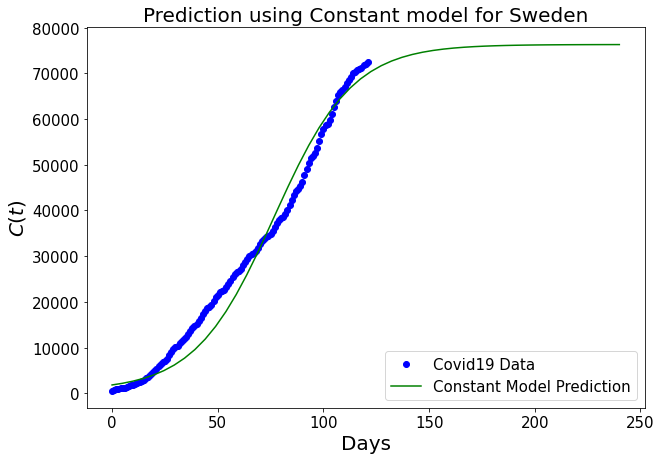

In [14]:
xL = np.linspace(0, len(results7) + 118)
yL = np.min(results7) + (np.max(results7) - np.min(results7))*logistic_function(xL,  mean_Nf, mean_beta, mean_kappa)

from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))

ax1.set_title('Prediction using Constant model for Sweden',fontsize = 20)
ax1.plot(results6,results7,'bo')
ax1.plot(xL, yL,'g')
ax1.legend(('Covid19 Data','Constant Model Prediction'),loc='best',fontsize = 15)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$C(t)$', fontsize = 20)
ax1.tick_params(labelsize=15)

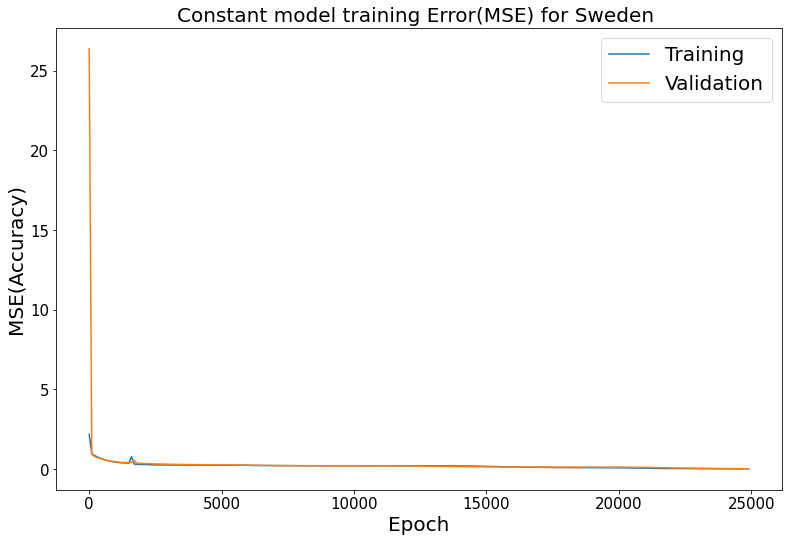

In [15]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Constant model training Error(MSE) for Sweden ',fontsize = 20)
ax1.plot(np.arange(0,25000,100), np.mean(mse_train_loss,0))
ax1.plot(np.arange(0,25000,100),np.mean(mse_validation_loss,0))
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('MSE(Accuracy)', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

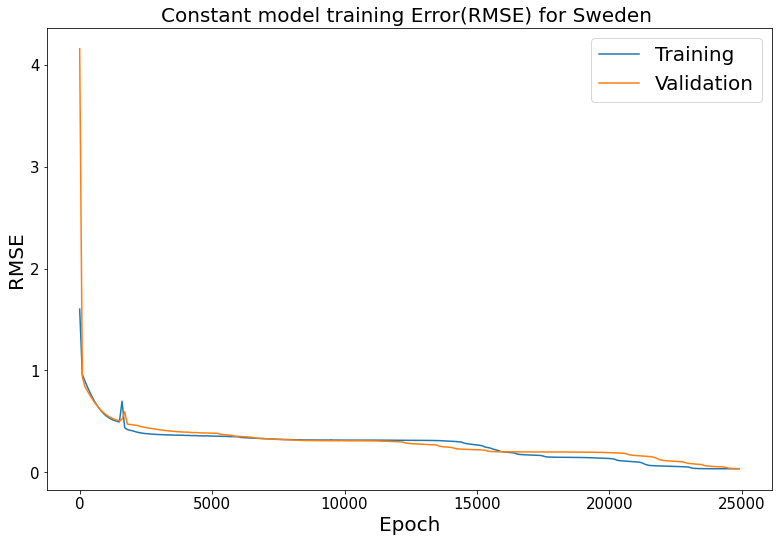

In [16]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Constant model training Error(RMSE) for Sweden ',fontsize = 20)
ax1.plot(np.arange(0,25000,100), np.mean(rmse_train_loss,0))
ax1.plot(np.arange(0,25000,100),np.mean(rmse_validation_loss,0))
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('RMSE', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

### Rational Model

In [17]:
T1R = np.loadtxt("timeR.txt")
I1R = np.loadtxt("infectdR.txt")
 
T0R = np.loadtxt("daysR.txt")
I0R = np.loadtxt("casesR.txt")
alphaR = np.loadtxt("alphaR.txt")

beta_valueR = np.loadtxt("betaR.txt")
kappa_valueR = np.loadtxt("kappaR.txt")
Nf_valueR = np.loadtxt("NfR.txt")
d_valueR = np.loadtxt("dR.txt")



R_sqR = np.loadtxt("R_sqR.txt")
MAPE_R = np.loadtxt("MAPE_R.txt")
EV_R = np.loadtxt("EV_R.txt")
RMSE_R = np.loadtxt("RMSE_R.txt")

mse_train_lossR = np.loadtxt("mse_train_lossR.txt")
mse_validation_lossR = np.loadtxt("mse_validation_lossR.txt")
rmse_train_lossR = np.loadtxt("rmse_train_lossR.txt")
rmse_validation_lossR = np.loadtxt("rmse_validation_lossR.txt")

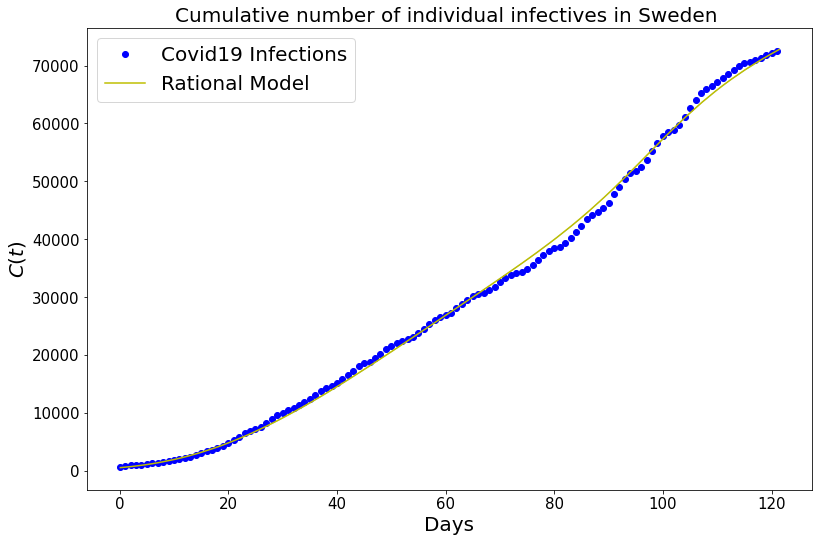

In [18]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Cumulative number of individual infectives in Sweden ',fontsize = 20)
ax1.plot(T0R,I0R,'bo')
ax1.plot(T1R[0,:],np.mean(I1R,0),'y')
ax1.fill_between(T1R[0,:],                 
 np.mean(I1R,0)-(1.96*np.std(I1R,0)/np.sqrt(I1R.shape[0])),
 np.mean(I1R,0)+(1.96*np.std(I1R,0)/np.sqrt(I1R.shape[0])),
 alpha=0.5)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('$C(t)$', fontsize = 20)
ax1.legend(('Covid19 Infections','Rational Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

#savefig('./figures/italy_learn_params_01_new')

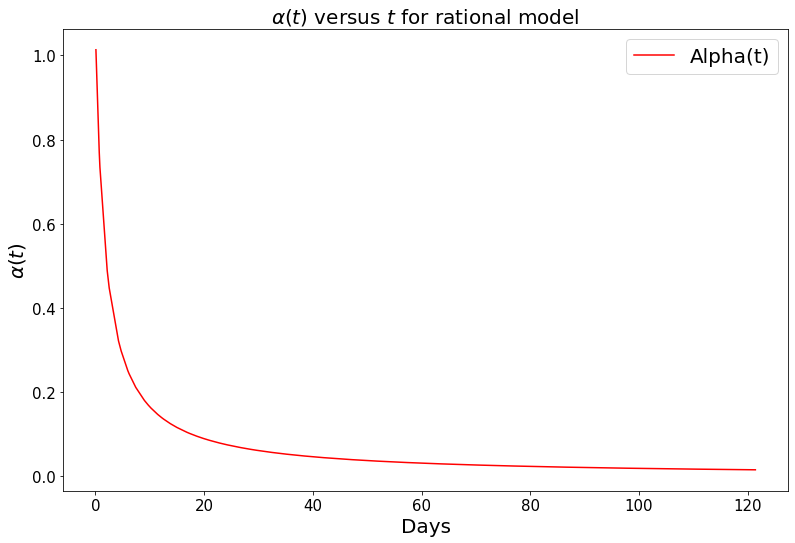

In [19]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))


ax1.set_title(r'$\alpha(t)$ versus $t$ for rational model',fontsize = 20)
ax1.plot(np.mean(T1R,0), np.mean(alphaR,0),'r')
ax1.legend(('Alpha(t)','Logistic Model'),loc='best',fontsize = 20)
ax1.tick_params(axis='both', labelsize = 24)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$\alpha(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [20]:
# mean and std of the parameters
 
beta_valueR = np.mean(beta_valueR)
kappa_valueR = np.mean(kappa_valueR)
Nf_valueR = np.mean(Nf_valueR)
d_valueR  = np.mean(d_valueR )


mean_R_sqR = np.mean(R_sqR)
mean_MAPER = np.mean(MAPE_R)
mean_EVR = np.mean(EV_R)
mean_RMSER = np.mean(RMSE_R)


# std_beta = np.std(results10)
# std_kappa = np.std(results11)
# std_Nf = np.std(results12)


# std_R_sq = np.std(results13)
# std_MAPE = np.std(results14)
# std_EV = np.std(results15)
# std_RMSE = np.std(results16)


#### Rational Parameters

In [21]:
print(beta_valueR)
print(kappa_valueR)
print(d_valueR)
print(np.min(results7) + (np.max(results7) - np.min(results7))*Nf_valueR)

6502.657324219001
1.960217273
0.551860835
193005.95162519402


#### Rational Metrices Error

In [22]:
print(mean_R_sqR)
print(mean_MAPER)
print(mean_EVR)
print(mean_RMSER)

0.9933899206518675
0.5124155673183945
0.7120573003360223
20312.131685148


In [23]:
logistic_function_rational = lambda t, Nf, beta, kappa, d: \
    Nf / (1 + beta * (1 + d*t)**-kappa)

In [24]:
def plateau(T0R, I0R, Nf_valueR, beta_valueR, kappa_valueR, d_valueR, function, diff = 10):
    #Nf_value, beta_value, kappa_value = logistic_params
    confirmed_now = I0R[-1]
    confirmed_then = I0R[-2]
    dayys = 52
    now = T0R[-1]
    while confirmed_now - confirmed_then > diff:
        dayys += 1
        confirmed_then = confirmed_now
        confirmed_now =  function(
        now + dayys,
        Nf_valueR,
        beta_valueR,
        kappa_valueR,
        d_valueR
        )
    return dayys, confirmed_now

In [25]:
dayys, confirmed_now = plateau(T0R, I0R, Nf_valueR, beta_valueR, kappa_valueR, d_valueR, logistic_function_rational)
print(f"In {dayys} days the number of infected people will plateau at {int(np.min(I0R) + (np.max(I0R) - np.min(I0R))*confirmed_now)}")

In 53 days the number of infected people will plateau at 105825


#### Rational Prediction

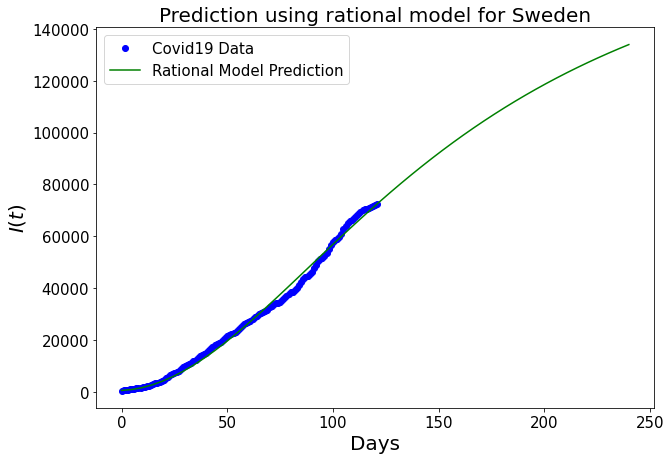

In [26]:
xR = np.linspace(0, len(I0R) + 118)
yR = np.min(I0R) + (np.max(I0R) - np.min(I0R))*logistic_function_rational(xR, Nf_valueR, beta_valueR, kappa_valueR,d_valueR)

from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Prediction using rational model for Sweden',fontsize = 20)
ax1.plot(T0R,I0R,'bo')
ax1.plot(xR, yR,'g')
ax1.legend(('Covid19 Data','Rational Model Prediction'),loc='best',fontsize = 15)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$I(t)$', fontsize = 20)
ax1.tick_params(labelsize=15)

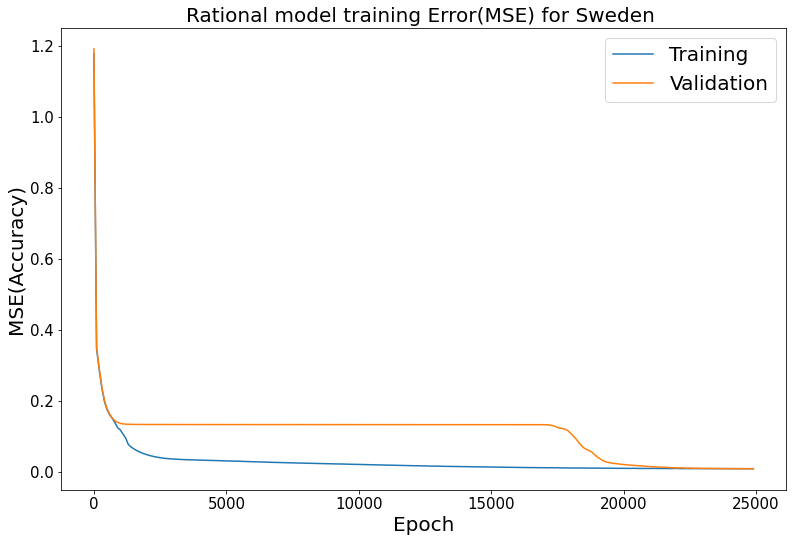

In [27]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Rational model training Error(MSE) for Sweden ',fontsize = 20)
ax1.plot(np.arange(0,25000,100), np.mean(mse_train_lossR,0))
ax1.plot(np.arange(0,25000,100),np.mean(mse_validation_lossR,0))
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('MSE(Accuracy)', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

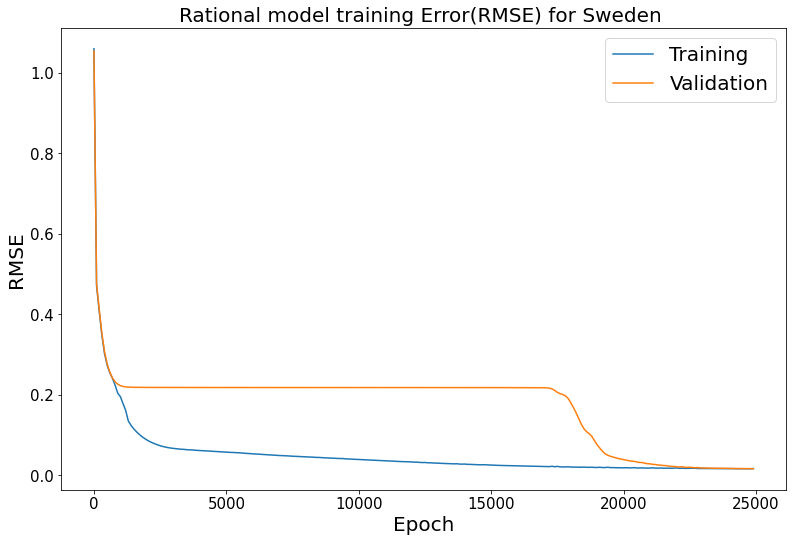

In [28]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Rational model training Error(RMSE) for Sweden ',fontsize = 20)
ax1.plot(np.arange(0,25000,100), np.mean(rmse_train_lossR,0))
ax1.plot(np.arange(0,25000,100),np.mean(rmse_validation_lossR,0))
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('RMSE', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

### Birational Model

In [29]:
T1B = np.loadtxt("timeB.txt")
I1B = np.loadtxt("infectdB.txt")
 
T0B = np.loadtxt("daysB.txt")
I0B = np.loadtxt("casesB.txt")
alphaB = np.loadtxt("alphaB.txt")

beta_valueB = np.loadtxt("betaB.txt")
beta1_valueB = np.loadtxt("beta1B.txt")
kappa_valueB = np.loadtxt("kappaB.txt")
kappa1_valueB = np.loadtxt("kappa1B.txt")
c_valueB = np.loadtxt("cB.txt")
c1_valueB = np.loadtxt("c1B.txt")
d_valueB = np.loadtxt("dB.txt")
d1_valueB = np.loadtxt("d1B.txt")




R_sqB = np.loadtxt("R_sqB.txt")
MAPE_B = np.loadtxt("MAPE_B.txt")
EV_B = np.loadtxt("EV_B.txt")
RMSE_B = np.loadtxt("RMSE_B.txt")

mse_train_lossB = np.loadtxt("mse_train_lossB.txt")
mse_validation_lossB = np.loadtxt("mse_validation_lossB.txt")
rmse_train_lossB = np.loadtxt("rmse_train_lossB.txt")
rmse_validation_lossB = np.loadtxt("rmse_validation_lossB.txt")

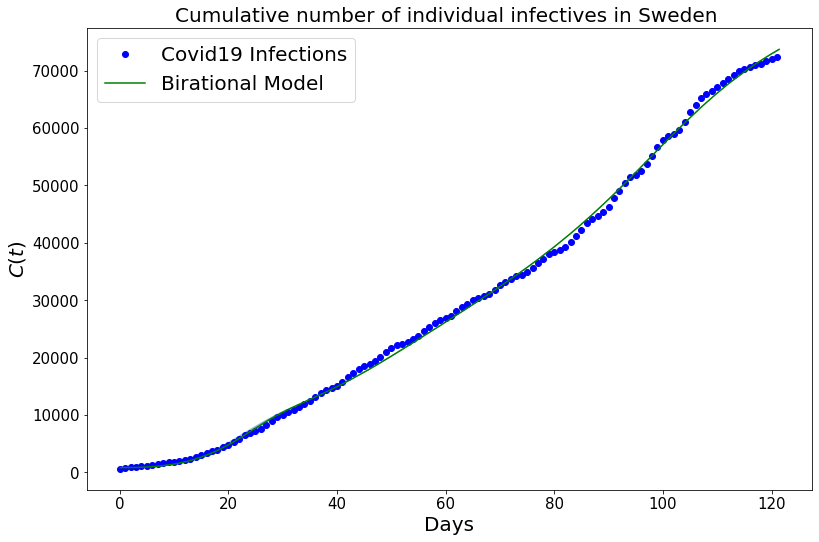

In [30]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Cumulative number of individual infectives in Sweden ',fontsize = 20)
ax1.plot(T0B,I0B,'bo')
ax1.plot(T1B[0,:],np.mean(I1B,0),'g')
ax1.fill_between(T1B[0,:],                 
 np.mean(I1B,0)-(1.96*np.std(I1B,0)/np.sqrt(I1B.shape[0])),
 np.mean(I1B,0)+(1.96*np.std(I1B,0)/np.sqrt(I1B.shape[0])),
 alpha=0.5)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('$C(t)$', fontsize = 20)
ax1.legend(('Covid19 Infections','Birational Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

#savefig('./figures/italy_learn_params_01_new')

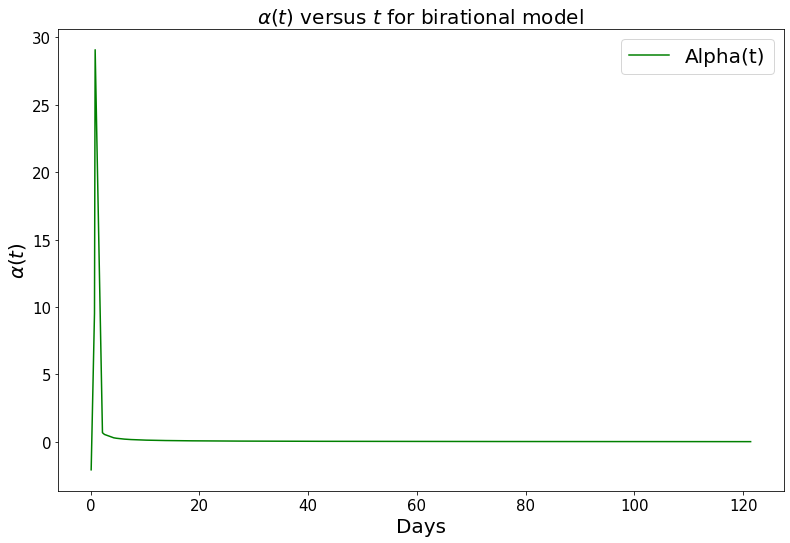

In [31]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))


ax1.set_title(r'$\alpha(t)$ versus $t$ for birational model',fontsize = 20)
ax1.plot(np.mean(T1B,0), np.mean(alphaB,0),'g')
ax1.legend(('Alpha(t)','Logistic Model'),loc='best',fontsize = 20)
ax1.tick_params(axis='both', labelsize = 24)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$\alpha(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [32]:
# mean and std of the parameters
 
beta_valueB = np.mean(beta_valueB)
beta1_valueB = np.mean(beta1_valueB)
kappa_valueB = np.mean(kappa_valueB)
kappa1_valueB = np.mean(kappa1_valueB)
c_valueB = np.mean(c_valueB)
c1_valueB = np.mean(c1_valueB)
d_valueB  = np.mean(d_valueB )
d1_valueB  = np.mean(d1_valueB )



mean_R_sqB = np.mean(R_sqB)
mean_MAPEB = np.mean(MAPE_B)
mean_EVB = np.mean(EV_B)
mean_RMSEB = np.mean(RMSE_B)


# std_beta = np.std(results10)
# std_kappa = np.std(results11)
# std_Nf = np.std(results12)


# std_R_sq = np.std(results13)
# std_MAPE = np.std(results14)
# std_EV = np.std(results15)
# std_RMSE = np.std(results16)


#### Birational Parameters

In [33]:
print(beta_valueB)
print(beta1_valueB)
print(kappa_valueB)
print(kappa1_valueB)
print(d_valueB)
print(d1_valueB)
print(np.min(results7) + (np.max(results7) - np.min(results7))*c_valueB)
print(np.min(results7) + (np.max(results7) - np.min(results7))*c1_valueB)

247.93472747700002
139.29242706399998
8.413180925999999
3.569310523
0.030587365999999998
0.023897416999999997
30666.377052043
148351.008607177


#### Birational Error metrices

In [34]:
print(mean_R_sqB)
print(mean_MAPEB)
print(mean_EVB)
print(mean_RMSEB)

0.9944909661372794
0.518784255448304
0.6987716476491527
20491.738973860793


#### Getting the plateau

In [35]:
def logistic_function_BirationalP(t, c, beta, kappa, d, c1, beta1, kappa1, d1):
    X = 40
    return (((c/(1+beta*(1 + d*X)**-kappa)) - (c1/(1+beta1*(1 + d1*X)**-kappa1))+ (c1/(1+beta1*(1 + d1*t)**-kappa1))))

In [36]:
def plateau(T0B, I0B, c_valueB, beta_valueB, kappa_valueB, d_valueB, c1_valueB, beta1_valueB, kappa1_valueB, d1_valueB,function, diff = 10):
    #Nf_value, beta_value, kappa_value = logistic_params
    confirmed_now = I0B[-1]
    confirmed_then = I0B[-2]
    dayys = 50
    now = T0B[-1]
    while confirmed_now - confirmed_then > diff:
        dayys += 1
        confirmed_then = confirmed_now
        confirmed_now =  function(
        now + dayys,
        c_valueB,
        beta_valueB,
        kappa_valueB,
        d_valueB,
        c1_valueB,
        beta1_valueB,
        kappa1_valueB,
        d1_valueB
        )
    return dayys, confirmed_now

In [37]:
dayys, confirmed_now = plateau(T0B, I0B, c_valueB, beta_valueB, kappa_valueB, d_valueB, c1_valueB, beta1_valueB, kappa1_valueB, d1_valueB, logistic_function_BirationalP)
print(f"In {dayys} days the number of infected people will plateau at {int(np.min(I0B) + (np.max(I0B) - np.min(I0B))*confirmed_now)}")

In 51 days the number of infected people will plateau at 117585


### Birational Prediction

In [38]:
def logistic_function_Birational(t, c, beta, kappa, d, c1, beta1, kappa1, d1):
    X = 20
    midpoint = len(np.argwhere(t <= X))
    t1 = t[:midpoint] # first half
    t2 = t[midpoint:]
    result1 = (c/(1+beta*(1 + d*t1)**-kappa))
    result2 = (((c/(1+beta*(1 + d*X)**-kappa)) - (c1/(1+beta1*(1 + d1*X)**-kappa1))+ (c1/(1+beta1*(1 + d1*t2)**-kappa1))))
    return np.concatenate((result1, result2))

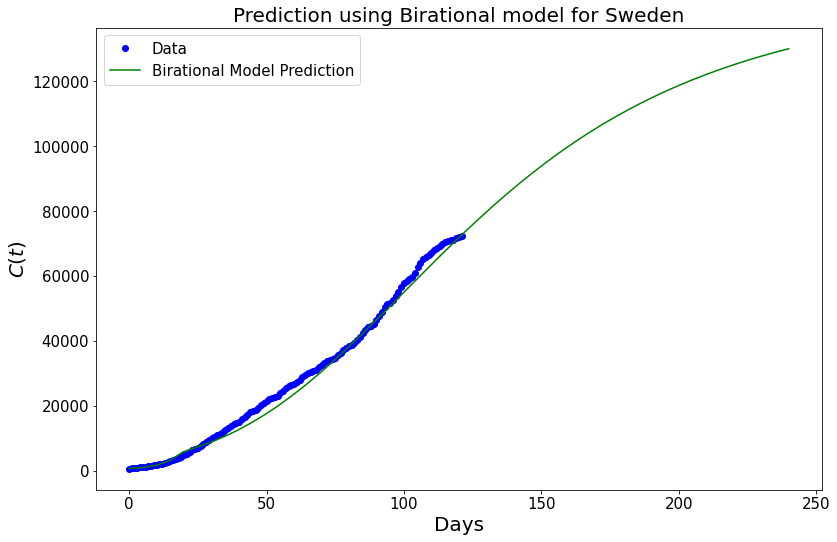

In [39]:
xB = np.linspace(0, len(I0B) + 118)
yB = np.min(I0B) + (np.max(I0B) - np.min(I0B))*logistic_function_Birational(xB, c_valueB, beta_valueB, kappa_valueB,d_valueB,c1_valueB, beta1_valueB, kappa1_valueB, d1_valueB)


from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))

ax1.set_title('Prediction using Birational model for Sweden',fontsize = 20)
ax1.plot(T0B,I0B, 'bo')
ax1.plot(xB, yB,'g')
ax1.legend(('Data','Birational Model Prediction'),loc='best',fontsize = 15)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$C(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

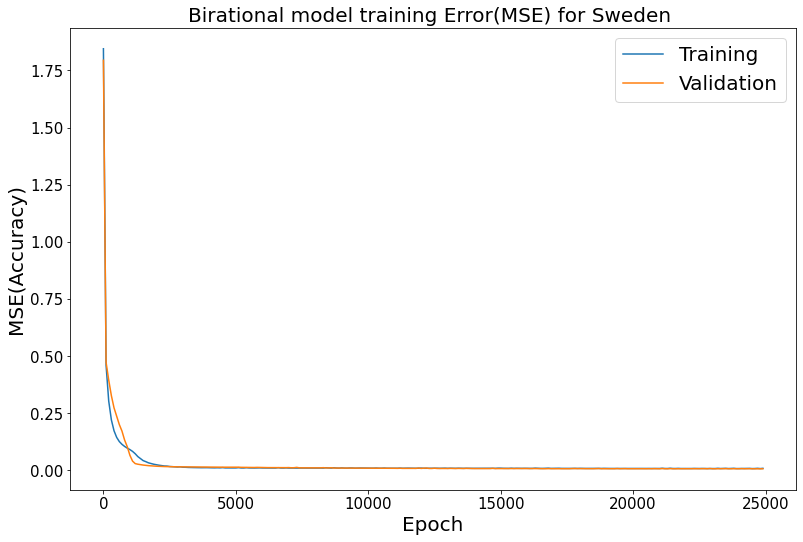

In [40]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Birational model training Error(MSE) for Sweden ',fontsize = 20)
ax1.plot(np.arange(0,25000,100), np.mean(mse_train_lossB,0))
ax1.plot(np.arange(0,25000,100),np.mean(mse_validation_lossB,0))
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('MSE(Accuracy)', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

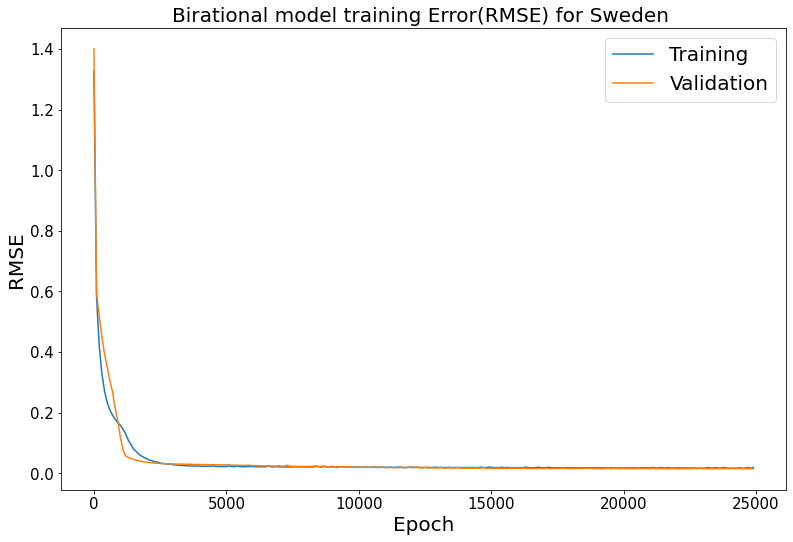

In [41]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Birational model training Error(RMSE) for Sweden ',fontsize = 20)
ax1.plot(np.arange(0,25000,100), np.mean(rmse_train_lossB,0))
ax1.plot(np.arange(0,25000,100),np.mean(rmse_validation_lossB,0))
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('RMSE', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

### Timeseries Model

In [3]:
T1A = np.loadtxt("timeA.txt")
I1A = np.loadtxt("infectdA.txt")
 
T0A = np.loadtxt("daysA.txt")
I0A = np.loadtxt("casesA.txt")
alphaA = np.loadtxt("alphaA.txt")

Nf_A = np.loadtxt("Nf_A.txt")


R_sqA = np.loadtxt("R_sqA.txt")
MAPE_A = np.loadtxt("MAPE_A.txt")
EV_A = np.loadtxt("EV_A.txt")
RMSE_A = np.loadtxt("RMSE_A.txt")

mse_train_lossA = np.loadtxt("mse_train_lossA.txt")
mse_validation_lossA = np.loadtxt("mse_validation_lossA.txt")
rmse_train_lossA = np.loadtxt("rmse_train_lossA.txt")
rmse_validation_lossA = np.loadtxt("rmse_validation_lossA.txt")

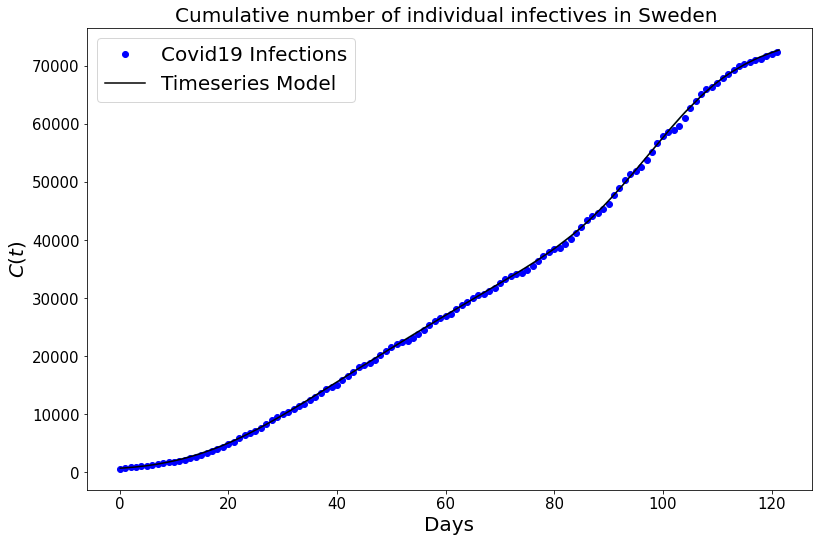

In [4]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Cumulative number of individual infectives in Sweden ',fontsize = 20)
ax1.plot(T0A,I0A,'bo')
ax1.plot(T1A[0,:],np.mean(I1A,0),'k')
ax1.fill_between(T1A[0,:],                 
 np.mean(I1A,0)-(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 np.mean(I1A,0)+(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 alpha=0.5)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('$C(t)$', fontsize = 20)
ax1.legend(('Covid19 Infections','Timeseries Model'),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

#savefig('./figures/italy_learn_params_01_new')

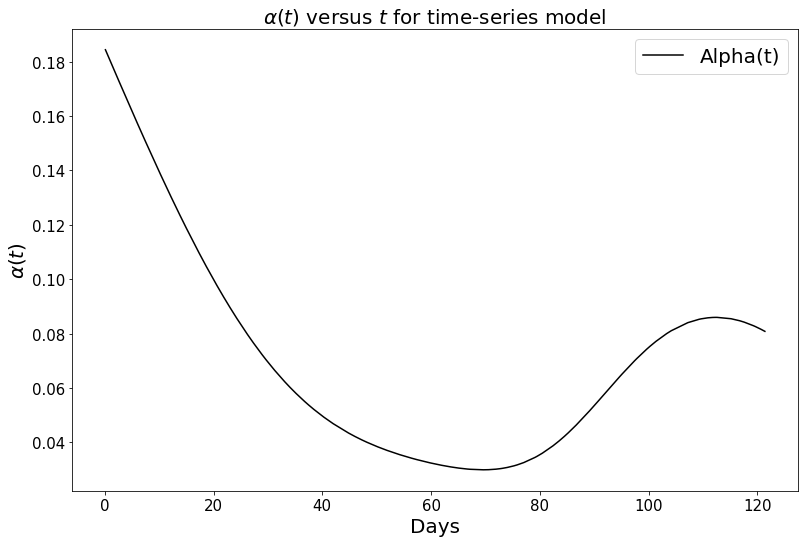

In [5]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))


ax1.set_title(r'$\alpha(t)$ versus $t$ for time-series model',fontsize = 20)
ax1.plot(np.mean(T1A,0), np.mean(alphaA,0),'k')
ax1.legend(('Alpha(t)','Logistic Model'),loc='best',fontsize = 20)
ax1.tick_params(axis='both', labelsize = 24)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel(r'$\alpha(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

In [6]:
# mean and std of the parameters
 
Nf_valueA = np.mean(Nf_A)




mean_R_sqA = np.mean(R_sqA)
mean_MAPEA = np.mean(MAPE_A)
mean_EVA = np.mean(EV_A)
mean_RMSEA = np.mean(RMSE_A)

#### Time-series Parameter and error metrices

In [12]:
print(np.min(results7) + (np.max(results7) - np.min(results7))*Nf_valueA)

print(mean_R_sqA)
print(mean_MAPEA)
print(mean_EVA)
print(mean_RMSEA)

77646.49778195
0.9909155138284629
0.489867489557725
0.707733517405398
20060.321342426123


### Time-series model prediction.

In [13]:
from scipy.integrate import odeint

In [14]:
def function(I, t, alpha, Nf):
    dIdt = alpha*I*(1 - (I/Nf))
    return dIdt

In [15]:
alpha = np.mean(alphaA,0)[-1]
Nf = Nf_valueA
I_p = np.mean(I1A,0)[-1]/(np.min(results7) + (np.max(results7) - np.min(results7)))

In [16]:
tt = np.linspace(122, 200)
I_PP = np.min(results7) + (np.max(results7) - np.min(results7))*odeint(function, I_p, tt, args=(alpha, Nf))
#tt1 =np.linspace(0,135)

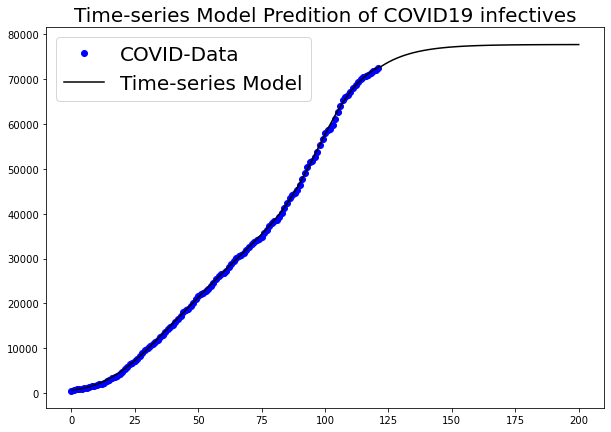

In [17]:

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Time-series Model Predition of COVID19 infectives',fontsize = 20)
ax1.plot(T0A,I0A,'bo')
ax1.plot(T1A[0,:],np.mean(I1A,0),'k')
ax1.fill_between(T1A[0,:],                 
 np.mean(I1A,0)-(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 np.mean(I1A,0)+(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 alpha=0.5)
ax1.plot(tt, I_PP,'k')
ax1.legend(('COVID-Data','Time-series Model'),loc='best',fontsize = 20)
ax1.tick_params(labelsize=10)

In [65]:
I_PP[-1]

array([77636.88952867])

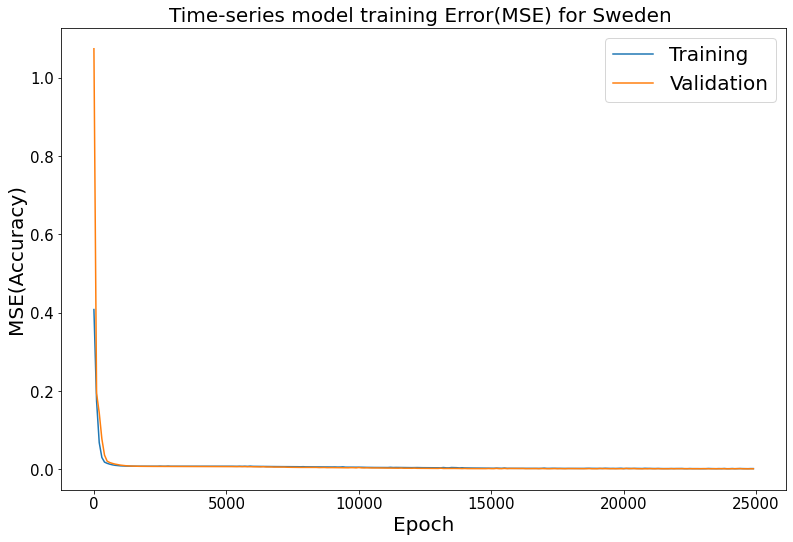

In [66]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Time-series model training Error(MSE) for Sweden ',fontsize = 20)
ax1.plot(np.arange(0,25000,100), np.mean(mse_train_lossA,0))
ax1.plot(np.arange(0,25000,100),np.mean(mse_validation_lossA,0))
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('MSE(Accuracy)', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

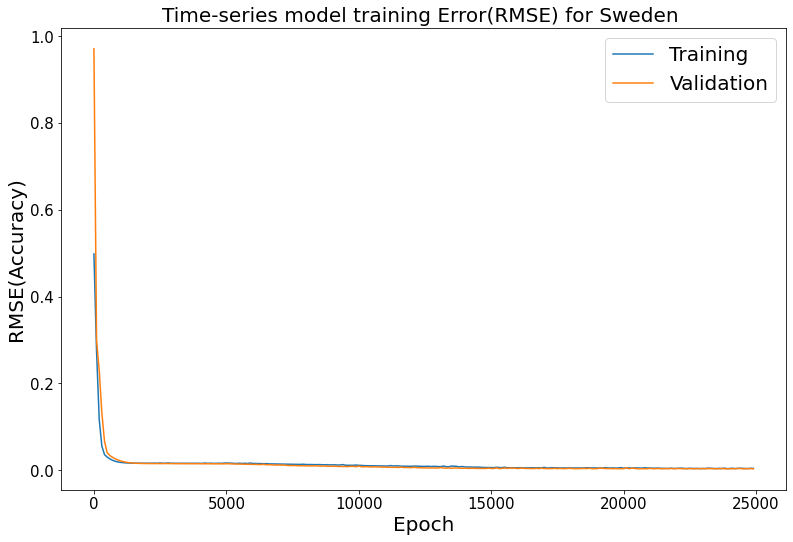

In [67]:
from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
ax1.set_title('Time-series model training Error(RMSE) for Sweden ',fontsize = 20)
ax1.plot(np.arange(0,25000,100), np.mean(rmse_train_lossA,0))
ax1.plot(np.arange(0,25000,100),np.mean(rmse_validation_lossA,0))
ax1.set_xlabel('Epoch', fontsize = 20)
ax1.set_ylabel('RMSE(Accuracy)', fontsize = 20)
ax1.legend(("Training", "Validation"),loc='best',fontsize = 20)
fig.set_size_inches(w=13,h=8.5)
ax1.tick_params(labelsize=15)

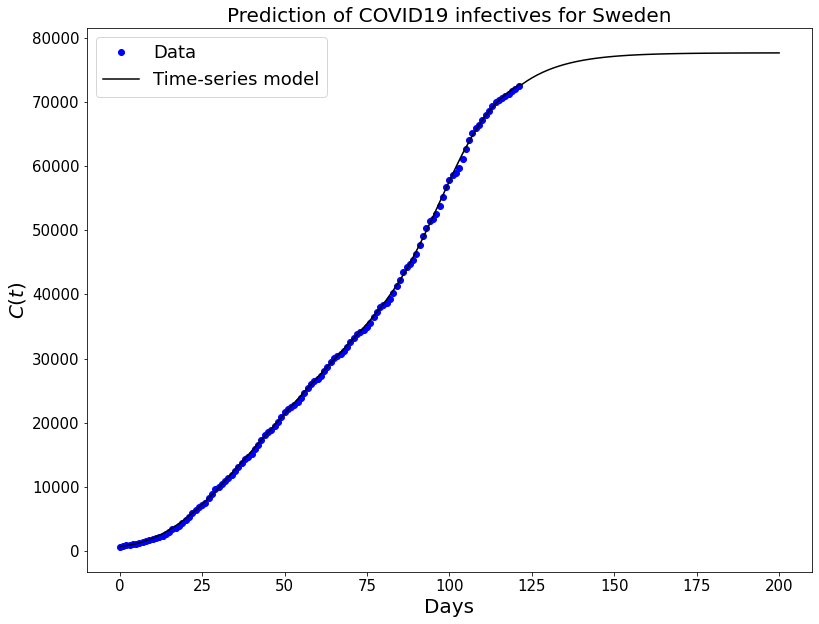

In [18]:

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 7))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(25, 7))


ax1.set_title('Prediction of COVID19 infectives for Sweden',fontsize = 20)
ax1.plot(T0A,I0A,'bo')


# ax1.plot(xL, yL)
# ax1.plot(xR, yR,'brown')
# ax1.plot(xB, yB)
ax1.plot(T1A[0,:],np.mean(I1A,0),'k')
ax1.fill_between(T1A[0,:],                 
 np.mean(I1A,0)-(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 np.mean(I1A,0)+(1.96*np.std(I1A,0)/np.sqrt(I1A.shape[0])),
 alpha=0.5)
ax1.plot(tt, I_PP,"black")
ax1.tick_params(axis='both', labelsize = 24)
ax1.set_xlabel('Days', fontsize = 20)
ax1.set_ylabel('$C(t)$', fontsize = 20)
fig.set_size_inches(w=13,h=10)
ax1.legend(('Data', 'Time-series model'),loc='best',fontsize = 18)
ax1.tick_params(labelsize=15)